# **Implementando Lógica de Inferência das Redes Neurais (Forward Propagation)**

## Definição de dados síntéticos

In [1]:
data = []

In [2]:
data.append((8.2, 0.45, 1.0))
data.append((9.4, 1.3, 1.0))
data.append((10.1, 2.1, 1.0))
data.append((8.4, 1.7, 1.0))
data.append((7.5, 2.3, 1.0))
data.append((9.0, 2.5, 1.0))
data.append((9.7, 2.9, 1.0))
data.append((8.4, 4.6, 1.0))
data.append((7.5, 5.0, 1.0))
data.append((9.0, 4.7, 1.0))
data.append((9.4, 4.9, 1.0))
data.append((9.7, 5.9, 1.0))
data.append((8.3, 6.2, 1.0))
data.append((7.6, 6.0, 1.0))
data.append((7.8, 3.5, 1.0))
data.append((7.0, 4.0, 1.0))
data.append((6.5, 5.0, 1.0))
data.append((5.8, 5.3, 1.0))
data.append((4.8, 5.6, 1.0))
data.append((3.8, 5.9, 1.0))
data.append((3.0, 6.4, 1.0))
data.append((1.8, 6.2, 1.0))
data.append((3.8, 7.1, 1.0))
data.append((5.8, 6.9, 1.0))
data.append((2.5, 8.0, 1.0))
data.append((5.0, 8.2, 1.0))
data.append((7.4, 8.4, 1.0))
data.append((8.5, 7.3, 1.0))
data.append((10.0, 7.1, 1.0))
data.append((1.0, 7.2, 1.0))
data.append((0.4, 7.6, 1.0))
data.append((2.0, 1.0, 0.0))
data.append((4.2, 0.95, 0.0))
data.append((6.0, 0.98, 0.0))
data.append((7.3, 0.5, 0.0))
data.append((6.7, 2.0, 0.0))
data.append((6.4, 3.0, 0.0))
data.append((6.2, 4.0, 0.0))
data.append((5.0, 4.5, 0.0))
data.append((4.0, 4.9, 0.0))
data.append((3.0, 5.1, 0.0))
data.append((2.3, 5.5, 0.0))
data.append((1.7, 4.5, 0.0))
data.append((5.5, 3.5, 0.0))
data.append((4.5, 3.9, 0.0))
data.append((3.5, 4.1, 0.0))
data.append((2.8, 4.6, 0.0))
data.append((4.0, 2.5, 0.0))
data.append((3.0, 2.9, 0.0))
data.append((2.0, 3.1, 0.0))
data.append((1.3, 3.6, 0.0))
data.append((5.3, 2.2, 0.0))
data.append((1.2, 2.0, 0.0))
data.append((3.0, 1.5, 0.0))
data.append((0.7, 5.6, 0.0))
data.append((0.4, 6.5, 0.0))

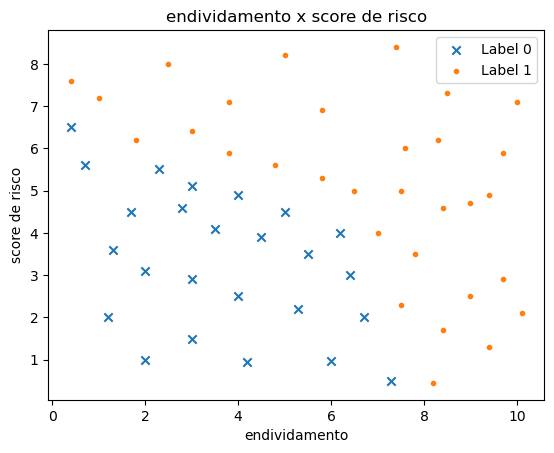

In [3]:
import matplotlib.pyplot as plt

# Separate data based on labels
x_zeros = [d[0] for d in data if d[2] == 0]
y_zeros = [d[1] for d in data if d[2] == 0]
x_ones = [d[0] for d in data if d[2] == 1]
y_ones = [d[1] for d in data if d[2] == 1]

# Create the scatter plot
plt.scatter(x_zeros, y_zeros, marker='x', label='Label 0')
plt.scatter(x_ones, y_ones, marker='.', label='Label 1')

# Add labels and title
plt.xlabel('endividamento')
plt.ylabel('score de risco')
plt.title('endividamento x score de risco')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [4]:
import pandas as pd
import numpy as np

In [5]:
abt_default = pd.DataFrame(data, columns=['endividamento', 'score_de_risco', 'default'])
abt_default.sample(5).head()

,endividamento,score_de_risco,default
26,7.4,8.4,1.0
46,2.8,4.6,0.0
50,1.3,3.6,0.0
31,2.0,1.0,0.0
21,1.8,6.2,1.0


In [6]:
abt_default.describe()

,endividamento,score_de_risco,default
count,56.000000,56.000000,56.000000
mean,5.341071,4.342500,0.553571
std,2.878496,2.152868,0.501621
min,0.400000,0.450000,0.000000
25%,3.000000,2.500000,0.000000
50%,5.400000,4.550000,1.000000
75%,7.650000,5.925000,1.000000
max,10.100000,8.400000,1.000000


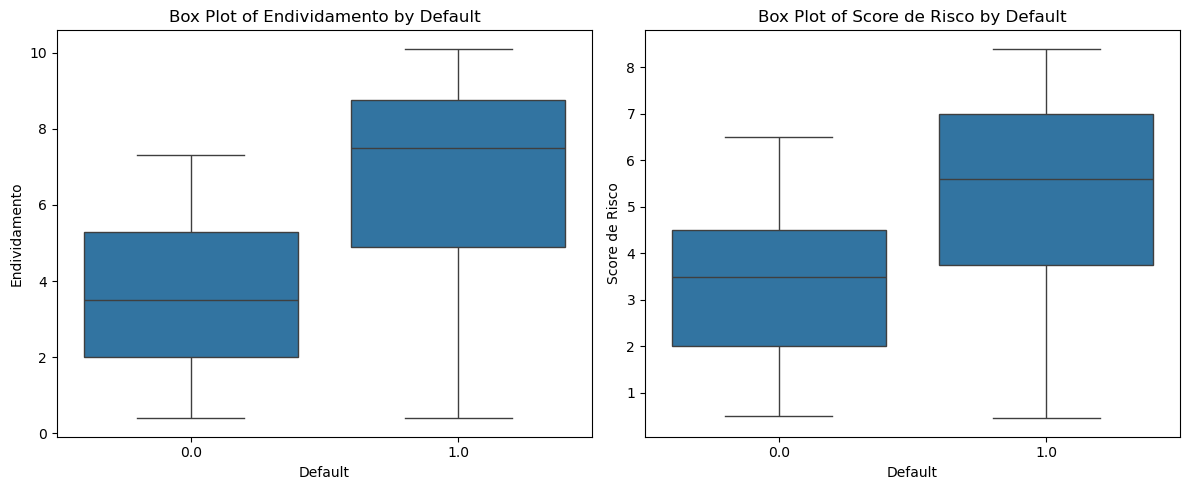

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create box plots for 'endividamento' and 'score_de_risco' by 'default'
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(x='default', y='endividamento', data=abt_default, ax=axes[0])
axes[0].set_title('Box Plot of Endividamento by Default')
axes[0].set_xlabel('Default')
axes[0].set_ylabel('Endividamento')

sns.boxplot(x='default', y='score_de_risco', data=abt_default, ax=axes[1])
axes[1].set_title('Box Plot of Score de Risco by Default')
axes[1].set_xlabel('Default')
axes[1].set_ylabel('Score de Risco')

plt.tight_layout()
plt.show()

## Modelo de Regressão Logística (sklearn)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Prepare the data from the abt_default DataFrame
# X should be a 2D array of features (endividamento, score_de_risco)
# y should be a 1D array of the target variable (default)
X = abt_default[['endividamento', 'score_de_risco']].values
y = abt_default['default'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
lr_model = LogisticRegression()

# Train the model on the training data
lr_model.fit(X_train, y_train)

print("Logistic Regression model fitted successfully.")

# Make predictions on the test data
y_pred = lr_model.predict(X_test)
y_prob = lr_model.predict_proba(X_test)

print()
print(abt_default.head())
print()
print(f"Input - [endividamento, score_de_risco]")
print()
print(f"Logistic regression coefficients: {lr_model.coef_[0]}")
print(f"Logistic regression bias: {lr_model.intercept_}")
print()

# # You can also access the model's coefficients and intercept
# print(f"Model coefficients: {logistic_regression_model.coef_}")
# print(f"Model intercept: {logistic_regression_model.intercept_}")

Logistic Regression model fitted successfully.

   endividamento  score_de_risco  default
0            8.2            0.45      1.0
1            9.4            1.30      1.0
2           10.1            2.10      1.0
3            8.4            1.70      1.0
4            7.5            2.30      1.0

Input - [endividamento, score_de_risco]

Logistic regression coefficients: [1.08165416 1.56768623]
Logistic regression bias: [-12.05604402]



**Função Logística**\
$σ(z) = 1 / (1 + eˆ(-z)) $\
\
**Modelo Treinado**\
$z = 1.08 * endividamento + 1.57 * score\_de\_risco - 12.06$\
$p = σ(z) $

## Modelo de Rede Neural (sklearn)

In [9]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

# Prepare the data from the abt_default DataFrame
# X should be a 2D array of features (endividamento, score_de_risco)
# y should be a 1D array of the target variable (default)
X = abt_default[['endividamento', 'score_de_risco']].values
y = abt_default['default'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Neural Network model with one hidden layer and two neurons
# 'hidden_layer_sizes=(2,)' specifies one hidden layer with 2 neurons
# 'max_iter' is set to a reasonable number to allow convergence
# 'activation='logistic'' specifies the sigmoid activation function
nn_model = MLPClassifier(hidden_layer_sizes=(2,), max_iter=1000, random_state=42, activation='logistic')

# Train the model on the training data
nn_model.fit(X_train, y_train)

print("Neural Network model fitted successfully.")

# Make predictions on the test data
y_pred_nn = nn_model.predict(X_test)
y_prob_nn = nn_model.predict_proba(X_test)

# You can also access the model's coefficients and intercept
print()
print(abt_default.head())
print()
print(f"Layer 0 (input) - [endividamento, score_de_risco]")
print()
print(f"Layer 1 (hidden) coefficients - neuron 1: {np.array([w[0] for w in nn_model.coefs_[0]])} | neuron 2: {np.array([w[1] for w in nn_model.coefs_[0]])}")
print(f"Layer 1 (hidden) biases   - neuron 1: {nn_model.intercepts_[0][0]} | neuron 2: {nn_model.intercepts_[0][1]}")
print()
print(f"Layer 2 (output) coefficients - neuron 1: {np.array([w[0] for w in nn_model.coefs_[1]])}")
print(f"Layer 2 (output) biases   - neuron 1: {nn_model.intercepts_[1][0]}")
print()

Neural Network model fitted successfully.

   endividamento  score_de_risco  default
0            8.2            0.45      1.0
1            9.4            1.30      1.0
2           10.1            2.10      1.0
3            8.4            1.70      1.0
4            7.5            2.30      1.0

Layer 0 (input) - [endividamento, score_de_risco]

Layer 1 (hidden) coefficients - neuron 1: [-0.18337553 -0.23116881] | neuron 2: [0.23413752 0.31804693]
Layer 1 (hidden) biases   - neuron 1: 0.796458851201216 | neuron 2: -1.7286824759512847

Layer 2 (output) coefficients - neuron 1: [-2.11456698  1.80660385]
Layer 2 (output) biases   - neuron 1: -0.4915823492481401



/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


**Função Logística**\
$σ(z) = 1 / (1 + eˆ(-z))$\
\
**Modelo Treinado**\
$z_{1,1} = (-0.18 * endividamento) + (-0.23 * score\_de\_risco) + 0.80$\
$z_{1,2} = (0.23 * endividamento) + (0.32 * score\_de\_risco) -1.73$\
$a_{1,1} = σ(z_{1,1})$\
$a_{1,2} = σ(z_{1,2})$\
$z_{2,1} = -2.11 * a_{1,1} + 1.81 * a_{1,2} -0.49$\
$a_{2,1} = σ(z_{2,1})$\
$p = a_{2,1} $

## Implementando lógica de inferência

Implementando lógica de inferência com os parâmetros aprendidos.

In [10]:
def inferencia_nn_model(score_data):
  z11 = -0.18337553  * score_data[:,0] -0.23116881 * score_data[:,1] + 0.796458851201216
  z12 = 0.23413752 * score_data[:,0] + 0.31804693 * score_data[:,1] -1.7286824759512847

  a11 = 1 / (1 + np.exp(-z11))
  a12 = 1 / (1 + np.exp(-z12))

  z21 = -2.11456698 * a11 + 1.80660385 * a12 -0.4915823492481401
  a21 = 1 / (1 + np.exp(-z21))
  p = a21

  return p

Comparando lógica criada com os métodos built-in do sklearn (`inferencia_nn_model(X_test)` e `nn_model.predict_proba(X_test)[:,1]` devem produzir o mesmo resutado).

In [11]:
inferencia_nn_model(X_test)

array([0.47772761, 0.61789031, 0.40682827, 0.69766192, 0.59306417,
       0.34821554, 0.54619603, 0.73857127, 0.51557449, 0.71376414,
       0.4433652 , 0.55800521])

In [12]:
nn_model.predict_proba(X_test)[:,1]

array([0.47772761, 0.61789031, 0.40682827, 0.69766191, 0.59306417,
       0.34821554, 0.54619603, 0.73857127, 0.51557448, 0.71376414,
       0.4433652 , 0.55800521])

In [13]:
lr_model.predict_proba(X_test)[:,1]

array([0.07719943, 0.83174693, 0.01746758, 0.99620642, 0.78643865,
       0.00665161, 0.39403113, 0.9998902 , 0.25452473, 0.99869642,
       0.07447875, 0.42431551])

## Demonstrando como a lógica pode ser implementada com uso de matrizes.

**Rede Neural - Método Forward - Forma Matricial**



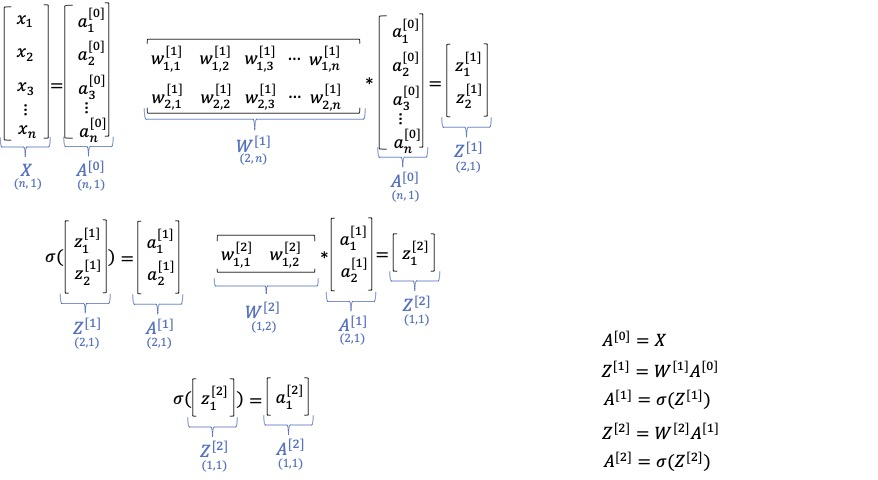

**Rede Neural - Método Forward - Forma Matricial - Exemplo**

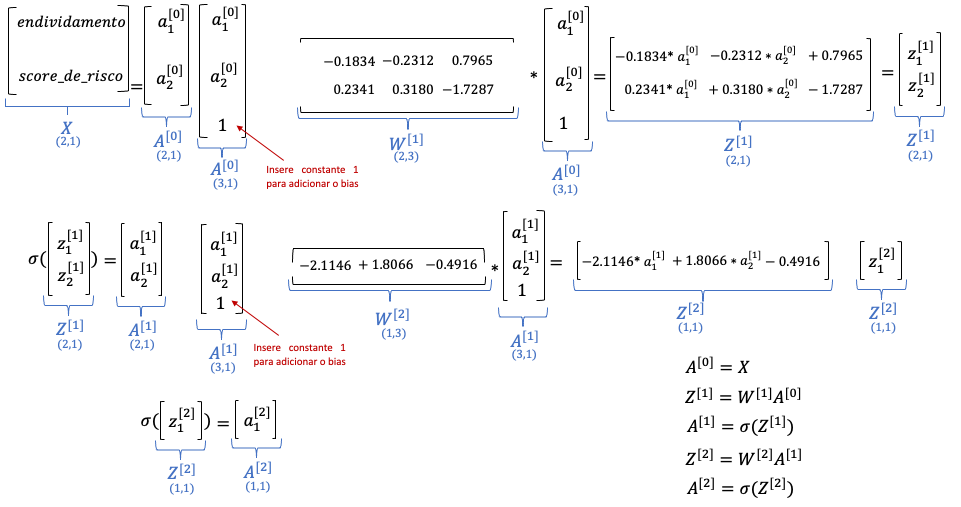

```
def inferencia_nn_model(score_data):
  z11 = -0.18337553  * score_data[:,0] -0.23116881 * score_data[:,1] + 0.796458851201216
  z12 = 0.23413752 * score_data[:,0] + 0.31804693 * score_data[:,1] -1.7286824759512847
  print(z11)
  print(z12)
  a11 = 1 / (1 + np.exp(-z11))
  a12 = 1 / (1 + np.exp(-z12))

  z21 = -2.11456698 * a11 + 1.80660385 * a12 -0.4915823492481401
  a21 = 1 / (1 + np.exp(-z21))
  p = a21

  return p
```



In [14]:
def inferencia_nn_model_matricial(score_data):
  W1 = np.matrix([
      [-0.18337553, -0.23116881, 0.796458851201216],
      [0.23413752, 0.31804693, -1.7286824759512847]
      ])
  W2 = np.matrix([[-2.11456698, 1.80660385, -0.4915823492481401]])

  X = np.matrix(score_data)
  X = np.hstack((X, np.ones((X.shape[0], 1))))

  Z1 = W1 * X.T

  A1 = 1 / (1 + np.exp(-Z1))
  A1 = np.vstack((A1, np.ones((1, A1.shape[1]))))

  Z2 = W2 * A1

  A2 = 1 / (1 + np.exp(-Z2))

  return A2.T

In [15]:
X_test

array([[8.2 , 0.45],
       [9.  , 2.5 ],
       [6.  , 0.98],
       [7.6 , 6.  ],
       [3.8 , 5.9 ],
       [1.3 , 3.6 ],
       [6.4 , 3.  ],
       [7.4 , 8.4 ],
       [4.5 , 3.9 ],
       [8.3 , 6.2 ],
       [0.7 , 5.6 ],
       [8.4 , 1.7 ]])

Nota-se abaixo que a implementação usando matriz produz o mesmo resultado do que observamos anteriormente.

In [16]:
inferencia_nn_model_matricial(X_test)

matrix([[0.47772761],
        [0.61789031],
        [0.40682827],
        [0.69766192],
        [0.59306417],
        [0.34821554],
        [0.54619603],
        [0.73857127],
        [0.51557449],
        [0.71376414],
        [0.4433652 ],
        [0.55800521]])

## Avaliação e comparação entre os modelos

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [18]:
# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.8333
Precision: 1.0000
Recall: 0.7143
F1-score: 0.8333


In [19]:
# Calculate and print evaluation metrics
accuracy_nn = accuracy_score(y_test, y_pred_nn)
precision_nn = precision_score(y_test, y_pred_nn)
recall_nn = recall_score(y_test, y_pred_nn)
f1_nn = f1_score(y_test, y_pred_nn)

print(f"Accuracy (NN): {accuracy_nn:.4f}")
print(f"Precision (NN): {precision_nn:.4f}")
print(f"Recall (NN): {recall_nn:.4f}")
print(f"F1-score (NN): {f1_nn:.4f}")

Accuracy (NN): 0.7500
Precision (NN): 0.7500
Recall (NN): 0.8571
F1-score (NN): 0.8000


O modelo com uma única camada oculta de 2 neurônios fica muito pior do que a regressão logística. Vamos criar um modelo de 2 camadas ocultas, contendo 16 e 8 neurônios respectivamente e utilizar tanh como função de ativação das camadas ocultas.

In [20]:
nn_model_2 = MLPClassifier(hidden_layer_sizes=(16,8), max_iter=1000, random_state=42, activation='tanh')

# Train the model on the training data
nn_model_2.fit(X_train, y_train)

print("Neural Network model fitted successfully.")

# Make predictions on the test data
y_pred_nn2 = nn_model_2.predict(X_test)
y_prob_nn2 = nn_model_2.predict_proba(X_test)

accuracy_nn = accuracy_score(y_test, y_pred_nn2)
precision_nn = precision_score(y_test, y_pred_nn2)
recall_nn = recall_score(y_test, y_pred_nn2)
f1_nn = f1_score(y_test, y_pred_nn2)

print(f"Accuracy (NN2): {accuracy_nn:.4f}")
print(f"Precision (NN2): {precision_nn:.4f}")
print(f"Recall (NN2): {recall_nn:.4f}")
print(f"F1-score (NN2): {f1_nn:.4f}")

Neural Network model fitted successfully.
Accuracy (NN2): 0.9167
Precision (NN2): 1.0000
Recall (NN2): 0.8571
F1-score (NN2): 0.9231


Com este último modelo, agora observa-se agora um ganho significativo com relação a regressão logística.